In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# Generate sample data
X, y = make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)

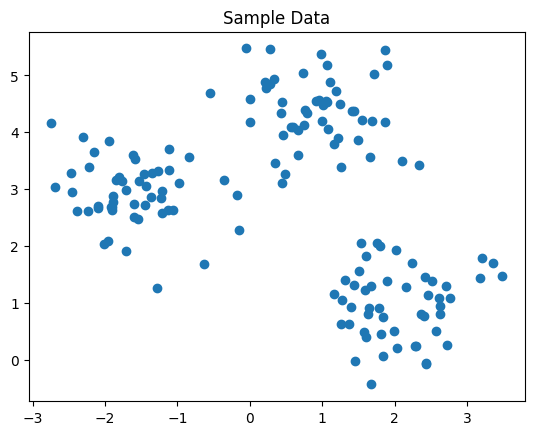

In [4]:
# Plot data points
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data")
plt.show()

In [5]:
# using elbow method to get the optimal value for k
inertia = []
k_values = range(1, 9)

In [6]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

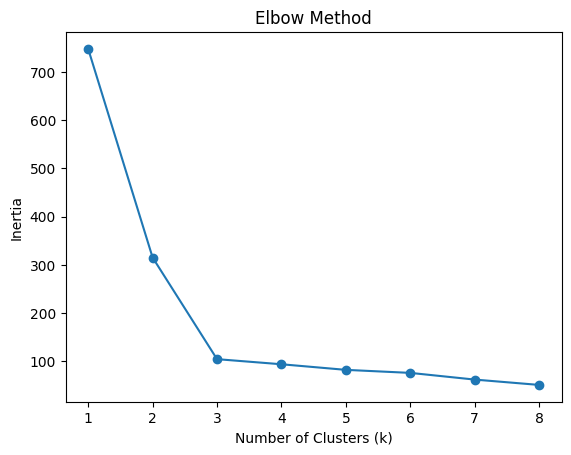

In [7]:
# Plot the Elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [12]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=52)
y_kmeans = kmeans.fit_predict(X)

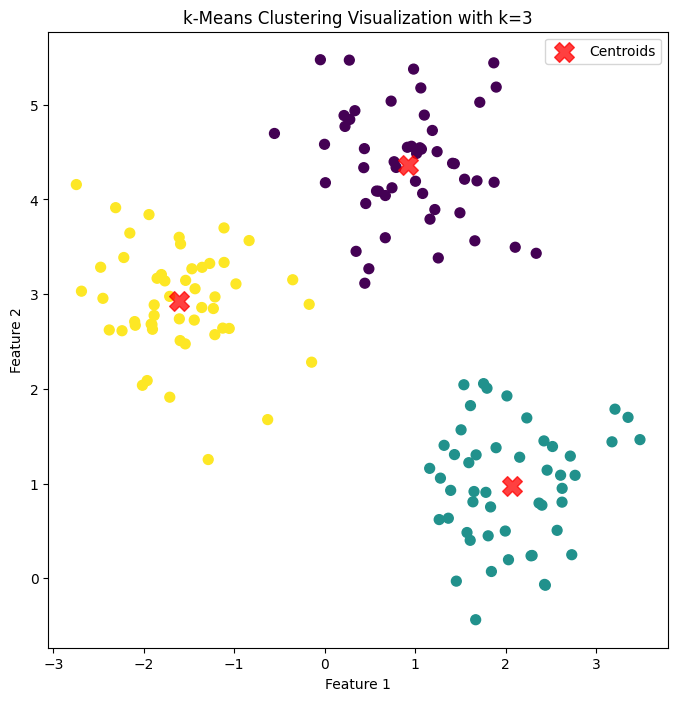

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title(f"k-Means Clustering Visualization with k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()